In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("parsed_England.csv")
df

,Unnamed: 0,subEventName,tags,positions,matchId,eventName,teamId,matchPeriod,eventSec,id,passportArea,weight,currentTeamId,height,role,birthArea,foot,shortName,currentNationalTeamId,player,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,label,date,referees,duration,competitionId
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",2499719,Pass,1609,1H,2.758649,177959171,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,1609.0,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",right,A. Lacazette,NaN,25413 - Alexandre Lacazette,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",2499719,Pass,1631,2H,2.836169,177960135,"{'name': 'Japan', 'id': '392', 'alpha3code': '...",70.0,1631.0,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",right,S. Okazaki,12913.0,14763 - Shinji Okazaki,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
2,1,High pass,['Accurate'],"(32.55, 53.04)",2499719,Pass,1609,1H,4.946850,177959172,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,1609.0,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,R. Holding,NaN,370224 - Rob Holding,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
3,902,High pass,['Not accurate'],"(65.1, 39.44)",2499719,Pass,1631,2H,5.311682,177960136,"{'name': 'England', 'id': '0', 'alpha3code': '...",79.0,1631.0,188.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': '0', 'alpha3code': '...",right,H. Maguire,2413.0,8653 - Harry Maguire,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
4,2,Head pass,['Accurate'],"(53.55, 51.0)",2499719,Pass,1609,1H,6.542188,177959173,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,1609.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",left,M. \u00d6zil,3148.0,3319 - Mesut \u00d6zil,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,[],"(63.0, 0.0)",2499854,Interruption,1613,1H,2409.489052,210202474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Played,4405654,14,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",181150,2017-11-28 20:00:00,0,The Hawthorns,"West Bromwich Albion - Newcastle United, 2 - 2","November 28, 2017 at 9:00:00 PM GMT+1","[{'refereeId': 381852, 'role': 'referee'}, {'r...",Regular,364
227334,227480,Cross,"['Left foot', 'High', 'Accurate']","(22.05, 7.48)",2499854,Pass,1613,2H,2410.969438,210203307,"{'name': 'Scotland', 'id': 0, 'alpha3code': 'X...",71.0,1613.0,173.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",left,M. Ritchie,NaN,9227 - Matt Ritchie,Played,4405654,14,"{'1627':

## Baseline Model: 

- Given an event, predict the time until the next goal

- Given an event, predict who the next goal scorer will be 

- Think about splitting up the dataset to make Support Vector Classifier to work

## Feature Engineering:

- Get the distance between each feature

In [5]:
df["Win_Bool"] = 1*(df["teamId"] == df["winner"])
df

,Unnamed: 0,subEventName,tags,positions,matchId,eventName,teamId,matchPeriod,eventSec,id,passportArea,weight,currentTeamId,height,role,birthArea,foot,shortName,currentNationalTeamId,player,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,label,date,referees,duration,competitionId,Win_Bool
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",2499719,Pass,1609,1H,2.758649,177959171,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,1609.0,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",right,A. Lacazette,NaN,25413 - Alexandre Lacazette,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",2499719,Pass,1631,2H,2.836169,177960135,"{'name': 'Japan', 'id': '392', 'alpha3code': '...",70.0,1631.0,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",right,S. Okazaki,12913.0,14763 - Shinji Okazaki,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,0
2,1,High pass,['Accurate'],"(32.55, 53.04)",2499719,Pass,1609,1H,4.946850,177959172,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,1609.0,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",right,R. Holding,NaN,370224 - Rob Holding,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
3,902,High pass,['Not accurate'],"(65.1, 39.44)",2499719,Pass,1631,2H,5.311682,177960136,"{'name': 'England', 'id': '0', 'alpha3code': '...",79.0,1631.0,188.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': '0', 'alpha3code': '...",right,H. Maguire,2413.0,8653 - Harry Maguire,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,0
4,2,Head pass,['Accurate'],"(53.55, 51.0)",2499719,Pass,1609,1H,6.542188,177959173,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,1609.0,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':...",left,M. \u00d6zil,3148.0,3319 - Mesut \u00d6zil,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,[],"(63.0, 0.0)",2499854,Interruption,1613,1H,2409.489052,210202474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Played,4405654,14,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",181150,2017-11-28 20:00:00,0,The Hawthorns,"West Bromwich Albion - Newcastle United, 2 - 2","November 28, 2017 at 9:00:00 PM GMT+1","[{'refereeId': 381852, 'role': 'referee'}, {'r...",Regular,364,0
227334,227480,Cross,"['Left foot', 'High', 'Accurate']","(22.05, 7.48)",2499854,Pass,1613,2H,2410.969438,210203307,"{'name': 'Scotland', 'id': 0, 'alpha3code': 'X...",71.0,1613.0,173.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",left,M. Ritchie,NaN,9227 - Matt Ritchie,Pl

In [7]:
df = df.drop(["matchId", "teamId", "matchPeriod", "id", "passportArea", "weight", "currentTeamId", "height", "birthArea", "shortName", "currentNationalTeamId", "player", "status", "roundId", "gameweek", "seasonId", "dateutc", "winner", "venue", "label", "date", "referees", "duration", "duration", "competitionId"], axis = 1)

In [8]:
df

,Unnamed: 0,subEventName,tags,positions,eventName,eventSec,role,foot,teamsData,Win_Bool
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0
2,1,High pass,['Accurate'],"(32.55, 53.04)",Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
3,902,High pass,['Not accurate'],"(65.1, 39.44)",Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0
4,2,Head pass,['Accurate'],"(53.55, 51.0)",Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1
...,...,...,...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,[],"(63.0, 0.0)",Interruption,2409.489052,NaN,NaN,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0
227334,227480,Cross,"['Left foot', 'High', 'Accurate']","(22.05, 7.48)",Pass,2410.969438,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0
227335,227481,Touch,['Missed ball'],"(12.6, 31.28)",Others on the ball,2412.975868,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0
227336,227482,Air duel,"['Won', 'Accurate']","(6.3, 17.0)",Duel,2413.575387,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0


## Creating feature: Distance from origin of event

In [35]:
res = tuple(map(float, df["positions"][0][1:len(df["positions"][0])-1].split(', ')))
res

(51.45, 33.32)

In [36]:
print((res[0]**2 + res[1]**2))

3757.3249000000005


In [44]:
i = 0 
while i < len(df):
    tp = tuple(map(float, df["positions"][i][1:len(df["positions"][i])-1].split(', ')))
    df["dist"][i] = (tp[0]**2 + tp[1]**2)
    i += 1

<ipython-input-44-c99ba1277404>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist"][i] = (tp[0]**2 + tp[1]**2)


In [45]:
df

,Unnamed: 0,subEventName,tags,positions,eventName,eventSec,role,foot,teamsData,Win_Bool,dist
0,0,Simple pass,['Accurate'],"(51.45, 33.32)",Pass,2.758649,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,3757.3249
1,901,Simple pass,['Accurate'],"(52.5, 34.0)",Pass,2.836169,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,3912.2500
2,1,High pass,['Accurate'],"(32.55, 53.04)",Pass,4.946850,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,3872.7441
3,902,High pass,['Not accurate'],"(65.1, 39.44)",Pass,5.311682,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",right,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",0,5793.5236
4,2,Head pass,['Accurate'],"(53.55, 51.0)",Pass,6.542188,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",1,5468.6025
...,...,...,...,...,...,...,...,...,...,...,...
227333,226658,Ball out of the field,[],"(63.0, 0.0)",Interruption,2409.489052,NaN,NaN,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0,3969.0000
227334,227480,Cross,"['Left foot', 'High', 'Accurate']","(22.05, 7.48)",Pass,2410.969438,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",left,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0,542.1529
227335,227481,Touch,['Missed ball'],"(12.6, 31.28)",Others on the ball,2412.975868,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",right,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0,1137.1984
227336,227482,Air duel,"['Won', 'Accurate']","(6.3, 17.0)",Duel,2413.575387,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",right,"{'1627': {'scoreET': 0, 'coachId': 9454, 'side...",0,328.6900


## Time before the next goal

In [48]:
df["tags"].unique()

array(["['Accurate']", "['Not accurate']", "['Interception', 'Accurate']",
       '[]', "['Lost', 'Not accurate']", "['Won', 'Accurate']",
       "['Through', 'Not accurate']",
       "['Take on right', 'Lost', 'Not accurate']",
       "['Take on left', 'Won', 'Accurate']",
       "['Free space right', 'Won', 'Accurate']",
       "['Free space left', 'Lost', 'Not accurate']",
       "['Free space left', 'Sliding tackle', 'Lost', 'Not accurate']",
       "['Neutral', 'Accurate']",
       "['Free space left', 'Won', 'Accurate']",
       "['Free space right', 'Lost', 'Not accurate']",
       "['Assist', 'Right foot', 'High', 'Accurate']",
       "['Goal', 'Right foot', 'Opportunity', 'Position: Goal low left', 'Accurate']",
       "['Interception', 'Not accurate']",
       "['Goal', 'Position: Goal low left', 'Not accurate']",
       "['Interception']", "['Free space left', 'Neutral', 'Accurate']",
       "['Free space right', 'Neutral', 'Accurate']",
       "['Left foot', 'Opportunity', 

In [90]:
np.where(df["tags"] == "['Goal', 'Head/body', 'Opportunity', 'Position: Goal high center', 'Accurate']")

(array([   171,   4757,  62814,  75815,  97649, 134047, 140217, 210511]),)

In [92]:
#Don't forget to check if it's empty

res = list(map(str, df["tags"][227334][2:len(df["tags"][227334])- 2].split("', '")))
res


res = list(map(str, df["tags"][171][2:len(df["tags"][171])- 2].split("', '")))
res

if ('Goal' in res) & ('Accurate' in res):
    print(True)

# if "Left foot" in res:
#    print(True)

#df["tags"][0][2:len(df["tags"][0])-2]

True


In [97]:
df["Scored"] = np.zeros(len(df))

i = 0
while i < len(df):
    res = list(map(str, df["tags"][i][2:len(df["tags"][i])- 2].split("', '")))
    if ('Goal' in res) & ('Accurate' in res):
        df["Scored"][i] = 1
    i += 1

<ipython-input-97-741ae0aacdf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Scored"][i] = 1


/Users/williamgong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scored', ylabel='count'>

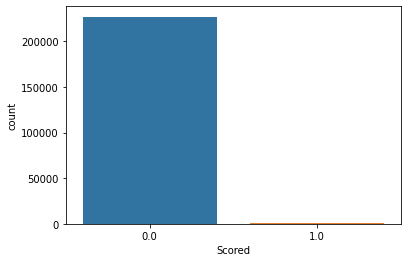

In [101]:
import seaborn as sns

sns.countplot(df["Scored"])

In [103]:
ls_j = np.where(df["Scored"] == 1)
ls_j

(array([    66,    171,    385,   1076,   1391,   1479,   1718,   2637,
          4135,   4141,   4659,   4757,   4762,   5797,   5960,   8025,
          8349,   9269,   9598,   9661,  10336,  10681,  13390,  13421,
         13511,  14117,  14226,  14776,  15869,  17309,  17729,  18741,
         19521,  21027,  21285,  23482,  25364,  25435,  25843,  28757,
         28787,  28861,  29073,  30044,  30623,  31217,  31305,  32397,
         32860,  33177,  34075,  35071,  35490,  35863,  37262,  39488,
         39656,  40150,  40422,  41708,  42062,  43573,  43722,  44119,
         45514,  47595,  48082,  48797,  48833,  49611,  50415,  50880,
         51370,  51798,  51999,  53487,  54439,  54860,  55335,  55724,
         56497,  57034,  57658,  57905,  58289,  58392,  59157,  59787,
         60630,  60800,  61568,  61626,  62814,  64152,  64305,  65226,
         65626,  65848,  68531,  70103,  70207,  72641,  72741,  73521,
         74786,  74984,  75036,  75472,  75717,  75815,  78885, 

In [112]:
len(ls_j[0])

342

In [119]:
df["time_diff"] = np.zeros(len(df))

i = 0
j = 0 
while i < ls_j[0][len(ls_j)-1]:
    df["time_diff"][i] = abs(df["eventSec"][i] - df["eventSec"][ls_j[0][j]]) 
    if i == ls_j[0][j]:
        j += 1
    i += 1

<ipython-input-119-5d8c5346a37d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_diff"][i] = abs(df["eventSec"][i] - df["eventSec"][ls_j[0][j]])


In [123]:
df["time_diff"]

0         91.837139
1         91.759619
2         89.648938
3         89.284106
4         88.053600
            ...    
227333     0.000000
227334     0.000000
227335     0.000000
227336     0.000000
227337     0.000000
Name: time_diff, Length: 227338, dtype: float64